### Riešenie projektu z MSP

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.anova import anova_lm
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

### Uloha 1

Riešenie prvej úlohy sme začali zbieranim dát z okolia študenta.

In [3]:
df = pd.read_csv('data.csv')
df

,Praha,Brno,Znojmo,Tišnov,Paseky,Horní Lomná,Dolní Věstvonice,okolie studenta
0,1327,915,681,587,284,176,215,32
1,510,324,302,257,147,66,87,11
2,352,284,185,178,87,58,65,15
3,257,178,124,78,44,33,31,4
4,208,129,70,74,6,19,32,2


a) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují zimní čas. 

In [4]:
row_sums = df.sum(axis=1)  # vypočítane sumy pre všetky hodnoty odpovedí
poc_all = row_sums[1]/row_sums[0]  # teoreticke zastupenie zimného času v celom prieskume
zas_all_let = row_sums[2]/row_sums[0] # zastupenie letneho času v celom prieskume
zas_all_swtch = row_sums[3]/row_sums[0] # zastupenie striedačov času v celom prieskume
zas_all_non = row_sums[4]/row_sums[0] # zastupenie nerozhodnych v celom prieskume
print("Zimný čas: " + str(poc_all))
print("Letny čas: " + str(zas_all_let))
print("Zmena času: " + str(zas_all_swtch))
print("Bez nazoru: " + str(zas_all_non))
print("Súčet: " + str(poc_all + zas_all_let + zas_all_swtch + zas_all_non))

Zimný čas: 0.40407872895423286
Letny čas: 0.29025373488261796
Zmena času: 0.17761441783258242
Bez nazoru: 0.12805311833056676
Súčet: 1.0


In [5]:
poc_teor = []
diff_teor = []
pocetnost = [510, 324, 302, 257, 147, 66, 87, 11]
iter = 0
for option in df:
    poc_teor.append(df[option][0] * poc_all)

for option in df:
    diff_teor.append((df[option][1] - poc_teor[iter])**2/poc_teor[iter])
    iter += 1

d = {'Mesta': ['Praha', 'Brno', 'Znojmo', 'Tišnov', 'Paseky', 'Horní Lomná', 'Dolní Věstonice', 'Okolie študenta'],
     'Početnosť': pocetnost,
     'Zastupenie teor - Zima': [poc_all, poc_all, poc_all, poc_all, poc_all, poc_all, poc_all, poc_all],
     'Početnosť teor': [poc_teor[0], poc_teor[1], poc_teor[2], poc_teor[3], poc_teor[4], poc_teor[5], poc_teor[6], poc_teor[7]],
     'rozdiel^2/teor_poc': [diff_teor[0], diff_teor[1], diff_teor[2], diff_teor[3], diff_teor[4], diff_teor[5], diff_teor[6], diff_teor[7]]}
df_zima = pd.DataFrame(data=d)
krit_hod = stats.chi2.ppf(1-0.05, 8-1-1)
chi_2 = stats.chisquare(pocetnost, poc_teor)[0]
if chi_2 > krit_hod:
    print("Hypotézu zamietame. Chi^2=" +
          str(chi_2) + " krit_hod=" + str(krit_hod))
else:
    print("Hypotézu nezamietame. Chi^2=" +
          str(chi_2) + " krit_hod=" + str(krit_hod))
df_zima


Hypotézu zamietame. Chi^2=20.921275431863503 krit_hod=12.591587243743977


,Mesta,Početnosť,Zastupenie teor - Zima,Početnosť teor,rozdiel^2/teor_poc
0,Praha,510,0.404079,536.212473,1.281383
1,Brno,324,0.404079,369.732037,5.656581
2,Znojmo,302,0.404079,275.177614,2.614458
3,Tišnov,257,0.404079,237.194214,1.653789
4,Paseky,147,0.404079,114.758359,9.058368
5,Horní Lomná,66,0.404079,71.117856,0.368296
6,Dolní Věstonice,87,0.404079,86.876927,0.000174
7,Okolie študenta,11,0.404079,12.930519,0.288225


b) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují letní čas.

In [6]:
poc_teor_let = []
diff_teor_let = []
pocetnost_let = [352, 284, 185, 178, 87, 58, 65, 15]
iter_let = 0
for option in df:
    poc_teor_let.append(df[option][0] * zas_all_let)

for option in df:
    diff_teor_let.append(
        (df[option][2] - poc_teor_let[iter_let])**2/poc_teor_let[iter_let])
    iter_let += 1

d_let = {'Mesta': ['Praha', 'Brno', 'Znojmo', 'Tišnov', 'Paseky', 'Horní Lomná', 'Dolní Věstonice', 'Okolie študenta'],
         'Početnosť': pocetnost_let,
         'Zastupenie teor - Leto': [zas_all_let, zas_all_let, zas_all_let, zas_all_let, zas_all_let, zas_all_let, zas_all_let, zas_all_let],
         'Početnosť teor': [poc_teor_let[0], poc_teor_let[1], poc_teor_let[2], poc_teor_let[3], poc_teor_let[4], poc_teor_let[5], poc_teor_let[6], poc_teor_let[7]],
         'rozdiel^2/teor_poc': [diff_teor_let[0], diff_teor_let[1], diff_teor_let[2], diff_teor_let[3], diff_teor_let[4], diff_teor_let[5], diff_teor_let[6], diff_teor_let[7]]}
df_let = pd.DataFrame(data=d_let)
krit_hod_let = stats.chi2.ppf(1-0.05, 8-1-1)
chi_2_let = stats.chisquare(pocetnost_let, poc_teor_let)[0]
if chi_2_let > krit_hod_let:
    print("Hypotézu zamietame. Chi^2=" + str(chi_2_let) +
          " krit_hod=" + str(krit_hod_let))
else:
    print("Hypotézu nezamietame. Chi^2=" +
          str(chi_2_let) + " krit_hod=" + str(krit_hod_let))
df_let


Hypotézu nezamietame. Chi^2=10.095165996786983 krit_hod=12.591587243743977


,Mesta,Početnosť,Zastupenie teor - Leto,Početnosť teor,rozdiel^2/teor_poc
0,Praha,352,0.290254,385.166706,2.855985
1,Brno,284,0.290254,265.582167,1.277257
2,Znojmo,185,0.290254,197.662793,0.811212
3,Tišnov,178,0.290254,170.378942,0.340890
4,Paseky,87,0.290254,82.432061,0.253131
5,Horní Lomná,58,0.290254,51.084657,0.936132
6,Dolní Věstonice,65,0.290254,62.404553,0.107946
7,Okolie študenta,15,0.290254,9.288120,3.512614


c) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují střídání času. 

In [7]:
poc_teor_swtch = []
diff_teor_swtch = []
pocetnost_swtch = [257, 178, 124, 78, 44, 33, 31, 4]
iter_swtch = 0
for option in df:
    poc_teor_swtch.append(df[option][0] * zas_all_swtch)

for option in df:
    diff_teor_swtch.append(
        (df[option][3] - poc_teor_swtch[iter_swtch])**2/poc_teor_swtch[iter_swtch])
    iter_swtch += 1

d_swtch = {'Mesta': ['Praha', 'Brno', 'Znojmo', 'Tišnov', 'Paseky', 'Horní Lomná', 'Dolní Věstonice', 'Okolie študenta'],
           'Početnosť': pocetnost_swtch,
           'Zastupenie teor - Zmena': [zas_all_swtch, zas_all_swtch, zas_all_swtch, zas_all_swtch, zas_all_swtch, zas_all_swtch, zas_all_swtch, zas_all_swtch],
           'Početnosť teor': [poc_teor_swtch[0], poc_teor_swtch[1], poc_teor_swtch[2], poc_teor_swtch[3], poc_teor_swtch[4], poc_teor_swtch[5], poc_teor_swtch[6], poc_teor_swtch[7]],
           'rozdiel^2/teor_poc': [diff_teor_swtch[0], diff_teor_swtch[1], diff_teor_swtch[2], diff_teor_swtch[3], diff_teor_swtch[4], diff_teor_swtch[5], diff_teor_swtch[6], diff_teor_swtch[7]]}
df_swtch = pd.DataFrame(data=d_swtch)
krit_hod_swtch = stats.chi2.ppf(1-0.05, 8-1-1)
chi_2_swtch = stats.chisquare(pocetnost_swtch, poc_teor_swtch)[0]
if chi_2_swtch > krit_hod_swtch:
    print("Hypotézu zamietame. Chi^2=" + str(chi_2_swtch) +
          " krit_hod=" + str(krit_hod_swtch))
else:
    print("Hypotézu nezamietame. Chi^2=" + str(chi_2_swtch) +
          " krit_hod=" + str(krit_hod_swtch))
df_swtch


Hypotézu zamietame. Chi^2=12.86264608015511 krit_hod=12.591587243743977


,Mesta,Početnosť,Zastupenie teor - Zmena,Početnosť teor,rozdiel^2/teor_poc
0,Praha,257,0.177614,235.694332,1.925933
1,Brno,178,0.177614,162.517192,1.475028
2,Znojmo,124,0.177614,120.955419,0.076635
3,Tišnov,78,0.177614,104.259663,6.613966
4,Paseky,44,0.177614,50.442495,0.822833
5,Horní Lomná,33,0.177614,31.260138,0.096836
6,Dolní Věstonice,31,0.177614,38.187100,1.352666
7,Okolie študenta,4,0.177614,5.683661,0.498748


d) U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení obyvatel, co preferují zimní čas.

In [8]:
zas_all_zim_3 = (row_sums[1] - 11)/(row_sums[0] - 32) # zastupenie zimneho času v prieskume okrem okolia študenta
poc_teor_zim_3 = []
diff_teor_zim_3 = []
pocetnost_zim_3 = [834, 559, 300]
# teoreticke početnosti pre zimný čas
pocet_vm = (1327+915)*zas_all_zim_3
pocet_mm = (681+587)*zas_all_zim_3
pocet_obec = (284+176+215)*zas_all_zim_3

d_zim_3 = {'Mesta': ['Väčšie mesta', 'Menšie mesta', 'Obce'],
           'Početnosť': pocetnost_zim_3, 'Zastupenie teor': [zas_all_zim_3, zas_all_zim_3, zas_all_zim_3],
           'Početnosť teor': [pocet_vm, pocet_mm, pocet_obec],
           'rozdiel^2/teor_poc': [(pocetnost_zim_3[0] - pocet_vm)**2/pocet_vm, (pocetnost_zim_3[1] - pocet_mm)**2/pocet_mm, (pocetnost_zim_3[2] - pocet_obec)**2/pocet_obec]}
df_zim_3 = pd.DataFrame(data=d_zim_3)
krit_hod_zim_3 = stats.chi2.ppf(1-0.05, 3-1-1)
chi_2_zim_3 = stats.chisquare(
    pocetnost_zim_3, [pocet_vm, pocet_mm, pocet_obec])[0]
if chi_2_zim_3 > krit_hod_zim_3:
    print("Hypotézu zamietame. Chi^2=" + str(chi_2_zim_3) +
          " krit_hod=" + str(krit_hod_zim_3))
else:
    print("Hypotézu nezamietame. Chi^2=" + str(chi_2_zim_3) +
          " krit_hod=" + str(krit_hod_zim_3))
df_zim_3


Hypotézu zamietame. Chi^2=12.661948651569508 krit_hod=3.841458820694124


,Mesta,Početnosť,Zastupenie teor,Početnosť teor,rozdiel^2/teor_poc
0,Väčšie mesta,834,0.40454,906.978734,5.872128
1,Menšie mesta,559,0.40454,512.956750,4.132865
2,Obce,300,0.40454,273.064516,2.656956


e) U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení nerozhodnutelných obyvatel.

In [9]:
zas_all_neroz_3 = (row_sums[4] - 2)/(row_sums[0] - 32) # zastupenie nerozhodných v prieskume okrem okolia študenta
poc_teor_neroz_3 = []
diff_teor_neroz_3 = []
pocetnost_neroz_3 = [337, 144, 57]
# teoreticke početnosti pre nerozhodných obyvatelov
pocet_vm_neroz = (1327+915)*zas_all_neroz_3
pocet_mm_neroz = (681+587)*zas_all_neroz_3
pocet_obec_neroz = (284+176+215)*zas_all_neroz_3

d_zim_3 = {'Mesta': ['Väčšie mesta', 'Menšie mesta', 'Obce'],
           'Početnosť': pocetnost_neroz_3, 'Zastupenie teor': [zas_all_neroz_3, zas_all_neroz_3, zas_all_neroz_3],
           'Početnosť teor': [pocet_vm_neroz, pocet_mm_neroz, pocet_obec_neroz],
           'rozdiel^2/teor_poc': [(pocetnost_neroz_3[0] - pocet_vm_neroz)**2/pocet_vm_neroz, (pocetnost_neroz_3[1] - pocet_mm_neroz)**2/pocet_mm_neroz, (pocetnost_neroz_3[2] - pocet_obec_neroz)**2/pocet_obec_neroz]}
df_zim_3 = pd.DataFrame(data=d_zim_3)
krit_hod_neroz_3 = stats.chi2.ppf(1-0.05, 3-1-1)
chi_2_neroz_3 = stats.chisquare(
    pocetnost_neroz_3, [pocet_vm_neroz, pocet_mm_neroz, pocet_obec_neroz])[0]
if chi_2_neroz_3 > krit_hod_neroz_3:
    print("Hypotézu zamietame. Chi^2=" + str(chi_2_neroz_3) +
          " krit_hod=" + str(krit_hod_neroz_3))
else:
    print("Hypotézu nezamietame. Chi^2=" + str(chi_2_neroz_3) +
          " krit_hod=" + str(krit_hod_neroz_3))
df_zim_3


Hypotézu zamietame. Chi^2=20.688664757394136 krit_hod=3.841458820694124


,Mesta,Početnosť,Zastupenie teor,Početnosť teor,rozdiel^2/teor_poc
0,Väčšie mesta,337,0.128554,288.218877,8.256218
1,Menšie mesta,144,0.128554,163.006930,2.216245
2,Obce,57,0.128554,86.774194,10.216201


f) Na základě odpovědí z okolí studenta zkuste určit z dat, zda student prováděl výzkum ve větším městě, menším městě nebo
v obci. Porovnejte výsledek se skutečností a okomentujte.

In [10]:
big_ss = [834, 636, 435, 327]
medium_ss = [559, 363, 202, 144]
small_ss = [300, 210, 108, 57]
my = [11, 15, 4, 2]
print("Vele mesta: ", end='')
print(stats.ttest_ind(big_ss, my, equal_var=False, alternative='two-sided'))
print("Mensie mesta: ", end='')
print(stats.ttest_ind(medium_ss, my, equal_var=False, alternative='two-sided'))
print("Obce: ", end='')
print(stats.ttest_ind(small_ss, my, equal_var=False, alternative='two-sided'))

Vele mesta: Ttest_indResult(statistic=4.905307766028999, pvalue=0.016164043363197746)
Mensie mesta: Ttest_indResult(statistic=3.3200864309574745, pvalue=0.04491165367338969)
Obce: Ttest_indResult(statistic=2.9673376530248934, pvalue=0.05873355141467863)


### Uloha 2

a) Určete vhodný model pomocí zpětné metody a regresní diagnostiky. V úvahu vezměte model polynomiální – kvadratický (v obou proměnných). Vycházejte tedy z regresní funkce: Z = Beta_1 + Beta_2 * X + Beta_3 * Y + Beta_4 * X^2 + Beta_5 * Y^2 + Beta_6 * X*Y až po Z = Beta_1 . Vhodnost nalezených modelů porovnejte pomocí koeficientu determinace R2. Možnost zjednodušení jednoho modelu na jeho submodel (model získaný vynecháním některého sloupce matice plánu) ověřte pomocí vhodného testu nulovosti regresních parametrů.

In [14]:
x_i = np.array([0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 2.22, 2.22, 2.22, 2.22, 2.22, 2.22, 2.22, 4.44, 4.44, 4.44, 4.44, 4.44, 4.44, 4.44, 6.67, 6.67, 6.67, 6.67, 6.67, 6.67, 6.67, 8.89, 8.89, 8.89, 8.89, 8.89, 8.89, 8.89, 11.11, 11.11,
               11.11, 11.11, 11.11, 11.11, 11.11, 13.33, 13.33, 13.33, 13.33, 13.33, 13.33, 13.33, 15.56, 15.56, 15.56, 15.56, 15.56, 15.56, 15.56, 17.78, 17.78, 17.78, 17.78, 17.78, 17.78, 17.78, 20.00, 20.00, 20.00, 20.00, 20.00, 20.00, 20.00])
y_i = np.array([0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33,
               10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00, 0.00, 1.67, 3.33, 5.00, 6.67, 8.33, 10.00])
z_i = np.array([120.68, -115.02, 87.58, -28.17, -223.77, -290.52, -282.98, 133.63, 123.61, 161.35, 90.89, 15.63, 3.74, -103.75, -128.99, 153.44, 51.49, 20.99, 142.35, 62.42, 182.95, -91.69, 192.12, 181.54, 315.05, 155.35, 419.78, 266.27, -237.2, -23.35, 197.43, 247.78, 500.4, 574.42,
               602.46, -214.31, 116.15, 113.88, 354.96, 464.26, 629, 688.28, -103.68, -112.34, 194.98, 367.42, 509.42, 478.35, 617.53, -497.34, -206.77, 35.52, 291.5, 305.15, 653.46, 913.29, -572.96, -339.47, 47.41, 226.88, 540.14, 939.87, 882.64, -693.98, -375.13, 62.92, 210.44, 555.85, 826.6, 1210.01])

def plot_res(predicted, x, y, z):
    plt.style.use('default')

    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    axes = [ax1, ax2, ax3]

    for ax in axes:
        ax.plot(x, y, z, color='k', zorder=10, linestyle='none', marker='D', alpha=0.5, label="Data")
        ax.scatter(x.flatten(), y.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#ff0000', label="Model")
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('y', fontsize=12)
        ax.set_zlabel('z', fontsize=12)
        ax.legend()

    ax1.view_init(elev=28, azim=120)
    ax2.view_init(elev=4, azim=114)
    ax3.view_init(elev=60, azim=165)

    fig.tight_layout()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     206.8
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           4.17e-38
Time:                        15:52:33   Log-Likelihood:                -413.00
No. Observations:                  70   AIC:                             838.0
Df Residuals:                      64   BIC:                             851.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.0036     44.220      1.402      0.1

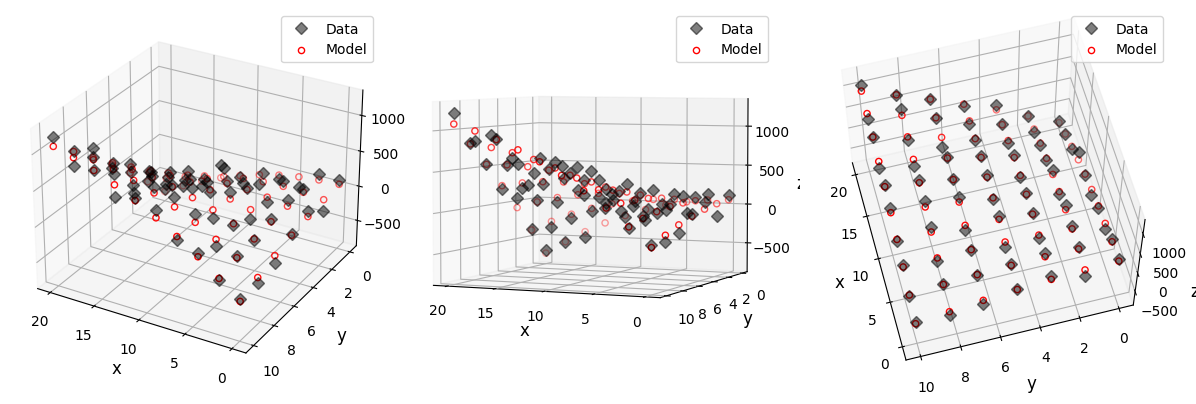

In [15]:
F_1 = np.column_stack((x_i, y_i, x_i**2, y_i**2, x_i * y_i))
F_1 = sm.add_constant(F_1)

model_1 = sm.OLS(z_i, F_1).fit()
plot_res(model_1.predict(F_1), x_i, y_i, z_i)
print(model_1.summary())

In [ ]:
F_2 = np.column_stack((y_i, x_i**2, y_i**2, x_i * y_i))
F_2 = sm.add_constant(F_2)
model_2 = sm.OLS(z_i, F_2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     262.4
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.45e-39
Time:                        16:48:22   Log-Likelihood:                -413.02
No. Observations:                  70   AIC:                             836.0
Df Residuals:                      65   BIC:                             847.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.4480     31.913      1.769      0.0

In [ ]:
F_3 = np.column_stack((x_i**2, y_i**2, x_i * y_i))
F_3 = sm.add_constant(F_3)
model_3 = sm.OLS(z_i, F_3).fit()
labels = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
testt = sms.het_breuschpagan(model_3.resid, model_3.model.exog)
lzip(labels, testt)

[('Lagrange multiplier statistic', 3.578445970636659),
 ('p-value', 0.3107295542943951),
 ('f-value', 1.18524494803605),
 ('f p-value', 0.3221633016189225)]

In [ ]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     353.7
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           1.36e-40
Time:                        16:48:22   Log-Likelihood:                -413.17
No. Observations:                  70   AIC:                             834.3
Df Residuals:                      66   BIC:                             843.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.0109     20.749      2.121      0.0

Critical Cooks distance: 0.05714285714285714
[13.33 13.33 15.56 17.78 20.  ]  :  [0.05953483 0.06227376 0.05987825 0.06178539 0.11675918]


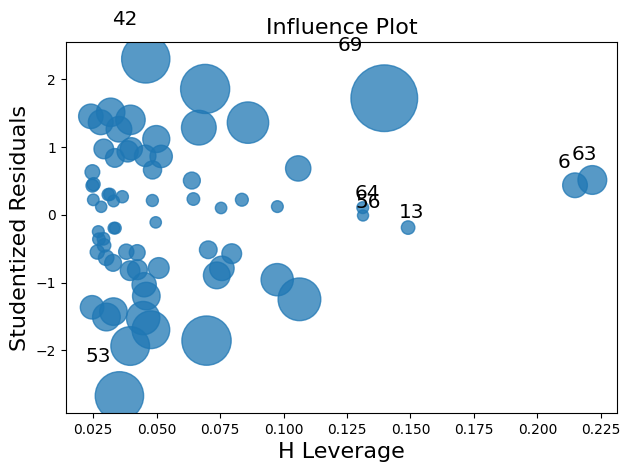

In [ ]:
fig = sm.graphics.influence_plot(model_3, criterion="cooks")
fig.tight_layout(pad=1.0)

# cookove vzdialenosti
model_cook = model_3.get_influence().cooks_distance[0]

n = len(x_i)
critical_d = 4/n
print('Critical Cooks distance:', critical_d)
# potectionalne hodnoty mimo
out_d = model_cook > critical_d
print(x_i[out_d], " : ", model_cook[out_d])

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sat, 03 Dec 2022   Prob (F-statistic):           2.16e-42
Time:                        16:48:22   Log-Likelihood:                -379.70
No. Observations:                  66   AIC:                             767.4
Df Residuals:                      62   BIC:                             776.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.9320     17.986      2.276      0.0

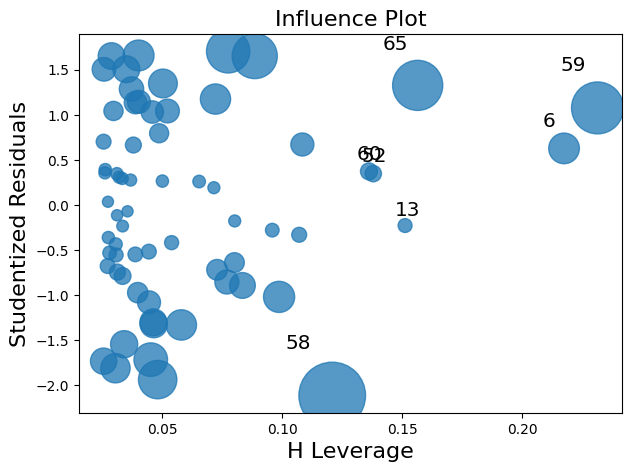

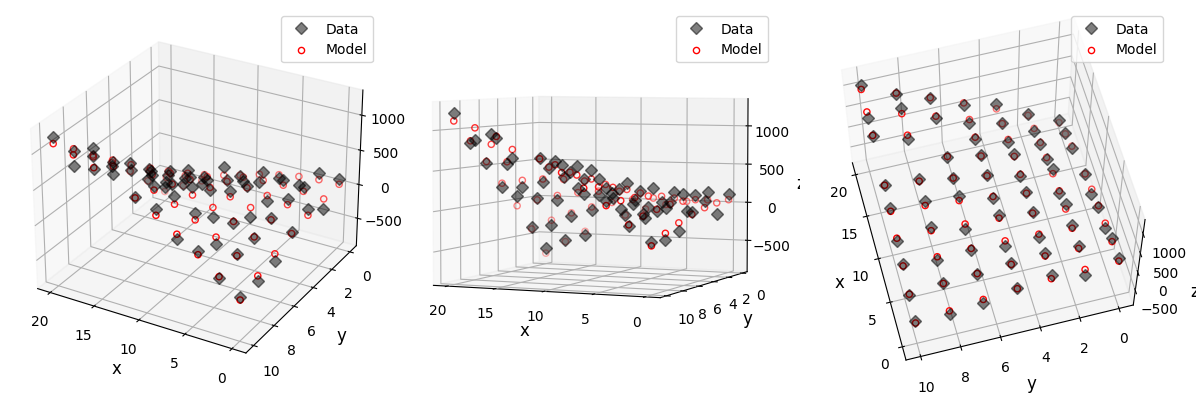

In [ ]:
x = np.delete(x_i, [42, 47, 48, 53])
y = np.delete(y_i, [42, 47, 48, 53])
z = np.delete(z_i, [42, 47, 48, 53])

F = np.column_stack((x**2, y**2, x * y))
F = sm.add_constant(F)

m = sm.OLS(z, F).fit()
print(m.summary())
fig = sm.graphics.influence_plot(m, criterion="cooks")
fig.tight_layout(pad=1.0)
plot_res(m.predict(F), x, y, z)

b) Pro takto získaný model (dostatečný submodel) uveďte v jedné tabulce odhady regresních parametrů metodou
nejmenších čtverců a jejich 95% intervaly spolehlivosti.

In [ ]:
intervals = m.conf_int(alpha=0.05)

d_m = {"Bety": [40.9320, -2.0226, -3.6777, 11.2531],
       "Intervalovy odhad": [intervals[0], intervals[1], intervals[2], intervals[3]]}

df_m = pd.DataFrame(data=d_m)
df_m


,Bety,Intervalovy odhad
0,40.9320,"[4.977879884146553, 76.88604731499493]"
1,-2.0226,"[-2.2509496711618673, -1.794335027527551]"
2,-3.6777,"[-4.568497472359534, -2.7868267038373005]"
3,11.2531,"[10.475411386734429, 12.030834095390489]"


c) Nestranně odhadněte rozptyl závisle proměnné.

In [ ]:
sse = np.sum((m.fittedvalues - z)**2)
print(sse/(66-4))

6189.317512032712


d) Vhodným testem zjistěte, že vámi zvolené dva regresní parametry jsou současně nulové.

In [ ]:
hyp = 'x1 = x2 = 0'
wald = m.wald_test(hyp, scalar=False)
print(wald) # zamietame, pretoze p < 0.05

<F test: F=array([[161.8569908]]), p=2.4542315831430707e-25, df_denom=62, df_num=2>


e) Vhodným testem zjistěte, že vámi zvolené dva regresní parametry jsou stejné.

In [ ]:
Ft = np.column_stack(((x**2+y**2), x * y))
Ft = sm.add_constant(Ft)

mt = sm.OLS(z, Ft).fit()

print(anova_lm(mt, m)) # zamietame a tento model je signifikantne iný

   df_resid            ssr  df_diff        ss_diff          F    Pr(>F)
0      63.0  496970.438825      0.0            NaN        NaN       NaN
1      62.0  383737.685746      1.0  113232.753079  18.294869  0.000067
